# Chapter 11 : 힘의 장 시뮬레이션하기

## 11.1 벡터장으로 중력 모델링하기

## 11.2 중력장 모델링하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x,y):
    return (-2*y , x)

In [5]:
def plot_vector_field(f, xmin, xmax, ymin, ymax, xstep=1, ystep=1):
    X,Y = np.meshgrid(np.arange(xmin, xmax, xstep), np.arange(ymin, ymax, ystep))
    U = np.vectorize(lambda x,y : f(x,y)[0])(X,Y)
    V = np.vectorize(lambda x,y : f(x,y)[1])(X,Y)
    plt.quiver(X, Y, U, V, color='red')
    fig = plt.gcf()
    fig.set_size_inches(7,7)

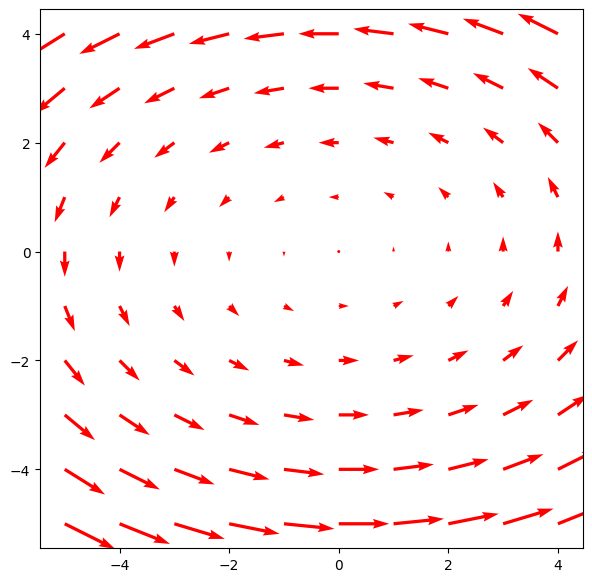

In [6]:
plot_vector_field(f, -5, 5, -5, 5)

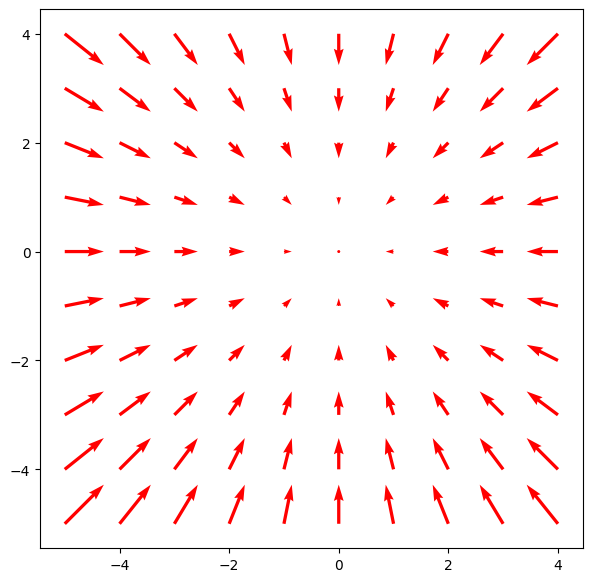

In [7]:
def f(x,y):
    return (-x,-y)

plot_vector_field(f, -5, 5, -5, 5)

## 11.3 소행성 게임에 중력 추가하기

See asteroids.py

### 11.3.2 연습문제

11.1 벡터장(-2-x, 4-y)의 모든 벡터가 어디를 향하는지 설명하라.

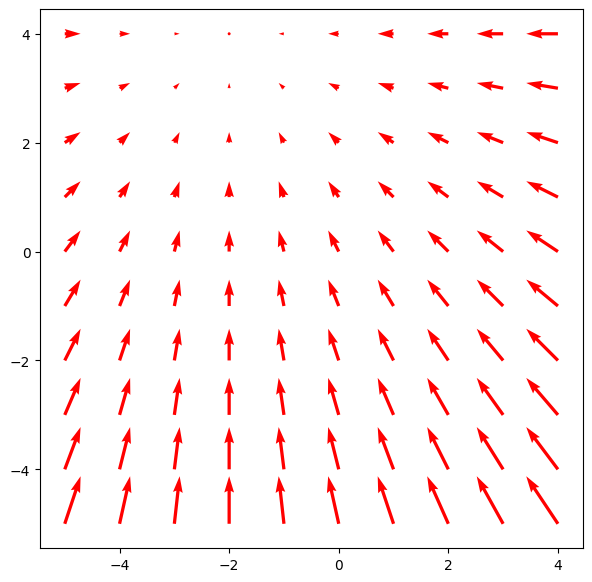

In [8]:
def g(x,y):
    return (-2-x, 4-y)

plot_vector_field(g, -5, 5, -5, 5)

## 11.4 위치에너지 도입하기

### 11.4.1 위치에너지 스칼라장 정의하기

In [9]:
def u(x,y):
    return 0.5 * (x**2 + y**2)

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def plot_scalar_field(f,xmin,xmax,ymin,ymax,xstep=0.25,ystep=0.25,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')

    fv = np.vectorize(f)
    
    # Make data.
    X = np.arange(xmin, xmax, xstep)
    Y = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased)

C:\Users\user\AppData\Local\Temp\ipykernel_14732\1904487585.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


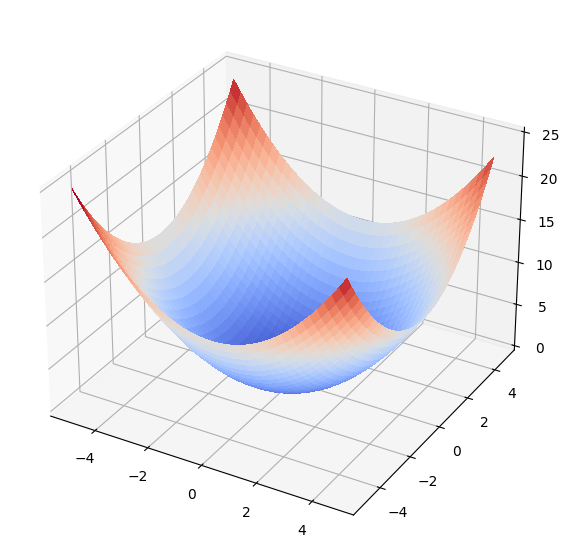

In [11]:
plot_scalar_field(u, -5, 5, -5, 5)

### 11.4.2 스칼라장을 히트맵으로 플로팅하기

C:\Users\user\AppData\Local\Temp\ipykernel_14732\1734229500.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(X,Y,z, cmap='plasma')


<Figure size 700x700 with 0 Axes>

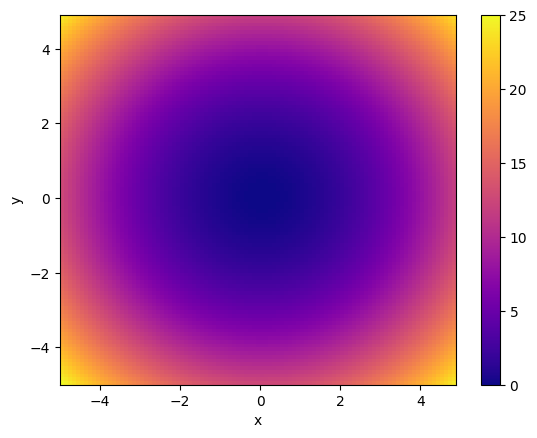

In [12]:
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xstep=0.1,ystep=0.1):
    fig = plt.figure()
    fig.set_size_inches(7,7)

    fv = np.vectorize(f)

    X = np.arange(xmin, xmax, xstep)
    Y = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    z = fv(X,Y)
    
#     # x and y are bounds, so z should be the value *inside* those bounds.
#     # Therefore, remove the last value from the z array.
#     z = z[:-1, :-1]
#     z_min, z_max = -z.min(), z.max()

    fig, ax = plt.subplots()

    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    # set the limits of the plot to the limits of the data
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)
    plt.xlabel('x')
    plt.ylabel('y')

scalar_field_heatmap(u,-5,5,-5,5)

### 11.4.3 스칼라장을 등고선도로 플로팅하기

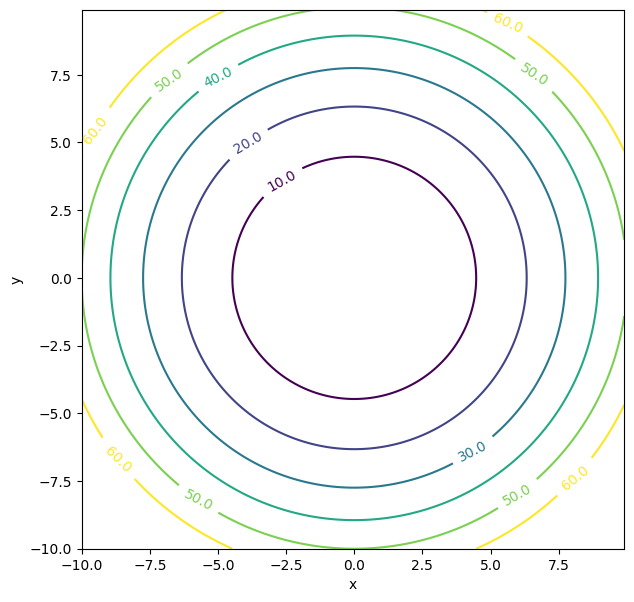

In [13]:
def scalar_field_contour(f,xmin,xmax,ymin,ymax,levels=None):

    fv = np.vectorize(f)

    X = np.arange(xmin, xmax, 0.1)
    Y = np.arange(ymin, ymax, 0.1)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    Z = fv(X,Y)
    
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z,levels=levels)
    ax.clabel(CS, inline=1, fontsize=10,fmt='%1.1f')
    plt.xlabel('x')
    plt.ylabel('y')
    fig.set_size_inches(7,7)
    
scalar_field_contour(u,-10,10,-10,10,levels=[10,20,30,40,50,60])

## 11.5 그라디언트로 에너지와 힘 연결하기

### 11.5.5 연습문제

11.4 y=1일 때 $h(x,y) = e^y\sin(x)$의 단면을 플로팅하라. 그리고 $x=\pi/6$일 때 h(x,y)의 단면을 플로팅하라.

In [14]:
def plot_function(f, xmin, xmax, color=None):
    ts = np.linspace(xmin, xmax, 1000)
    plt.plot(ts, [f(t) for t in ts], c=color)

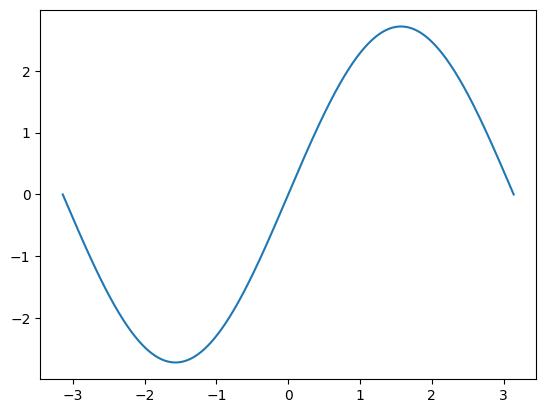

In [15]:
from math import pi, e, sin
plot_function(lambda x : e*sin(x), -pi, pi)

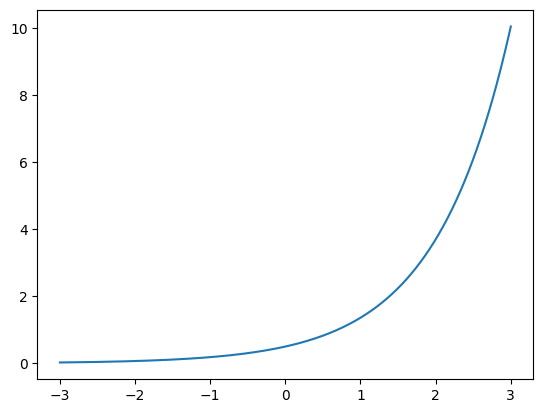

In [16]:
import math
plot_function(lambda y : math.exp(y)/2, -3, 3)